<a href="https://colab.research.google.com/github/pavankale25/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import global terrorism dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Global Terrorism Data.csv',encoding="latin-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#show all columns in global terrorism dataset
pd.set_option('display.max_columns',None)

In [ ]:
#default it shows first five rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
#column name not understand properly so its rename
df.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'Attack_type','success':'Success','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','weaptype1_txt':'Weapon_type','targtype1_txt':'Target_type','motive':'Motive'}, inplace=True)

In [ ]:
# total column in the dataset
list(df.columns)

['eventid',
 'Year',
 'Month',
 'Day',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'Country',
 'region',
 'Region',
 'State',
 'city',
 'Latitude',
 'Longitude',
 'specificity',
 'vicinity',
 'location',
 'Summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'Success',
 'suicide',
 'attacktype1',
 'Attack_type',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'Target_type',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'Target',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'Group_name',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'Motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'clai

In [ ]:
#it gives size of rows and columns in the dataset
df.shape

(181691, 135)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#data type of the column
df.dtypes

eventid                 int64
Year                    int64
Month                   int64
Day                     int64
approxdate             object
extended                int64
resolution             object
country                 int64
Country                object
region                  int64
Region                 object
State                  object
city                   object
Latitude              float64
Longitude             float64
specificity           float64
vicinity                int64
location               object
Summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
Success                 int64
suicide                 int64
attacktype1             int64
Attack_type            object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [ ]:
#total null values in the column
df.isna().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            172452
extended                   0
resolution            179471
country                    0
Country                    0
region                     0
Region                     0
State                    421
city                     434
Latitude                4556
Longitude               4557
specificity                6
vicinity                   0
location              126196
Summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
Success                    0
suicide                    0
attacktype1                0
Attack_type                0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [ ]:
#null values percentage
df.isna().sum()*100/len(df)

eventid                0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
Country                0.000000
region                 0.000000
Region                 0.000000
State                  0.231712
city                   0.238867
Latitude               2.507554
Longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
Summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
Success                0.000000
suicide                0.000000
attacktype1            0.000000
Attack_type            0.000000
attacktype2           96.524869
attackty

In [ ]:
'''In this dataset most of the columns have null values and that not contribute into the analysis so we removed the null values columns
and keep only necessary columns from the dataset.'''
column_to_keep = ['Year','Month','Day','State','Region','Latitude','Longitude','Attack_type','Country','Success','Target','Killed','Wounded','Summary',
                  'Group_name','Target_type','Weapon_type','Motive']

In [ ]:
df = df[column_to_keep]

In [ ]:
df.head(5)

,Year,Month,Day,State,Region,Latitude,Longitude,Attack_type,Country,Success,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive
0,1970,7,2,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,Dominican Republic,1,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Mexico,1,"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,Philippines,1,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,Greece,1,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Japan,1,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
#sze of new dataframe
df.shape

(181691, 18)

In [ ]:
#summary of a dataset
df.describe()

,Year,Month,Day,Latitude,Longitude,Success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000


In [ ]:
#correleraton of a dataset
df.corr()

,Year,Month,Day,Latitude,Longitude,Success,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,-0.082963,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,-0.002845,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.011802,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.073715,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000858,-0.000562,0.000223
Success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,1.000000,0.053115,0.025804
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.053115,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.025804,0.534375,1.000000


**Correleration Analysis**

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

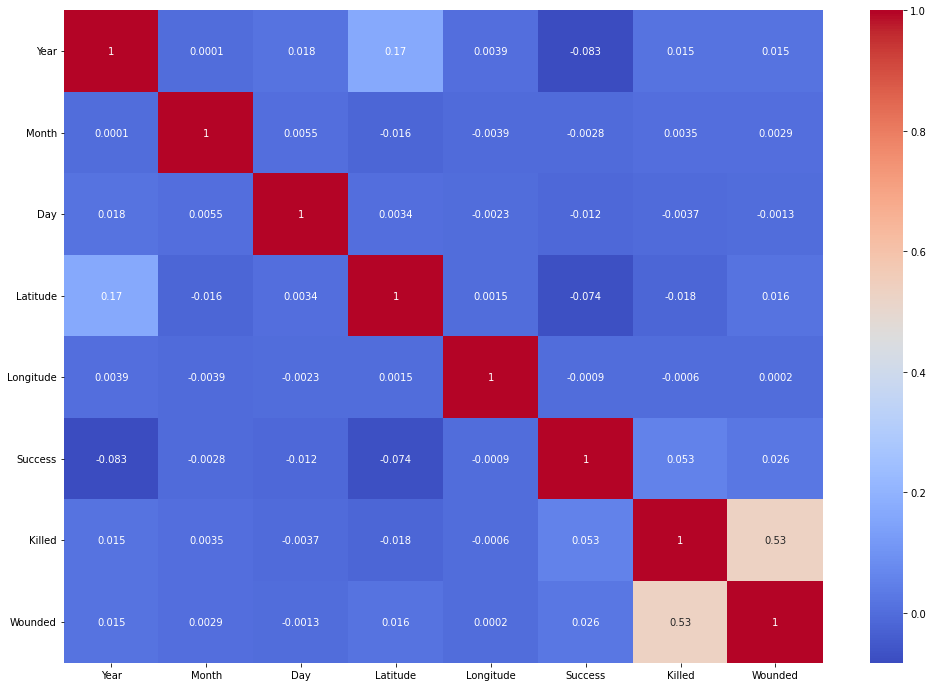

In [ ]:
plt.figure(figsize=(17,12))
sns.heatmap(np.round(df.corr(),4), annot=True, cmap= 'coolwarm')
plt.yticks(rotation=0)

# **Data Visualization**

## **First Objective : Comparing the Terrorist Activity in Each Year.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number Of Terror Attack For Each Year')

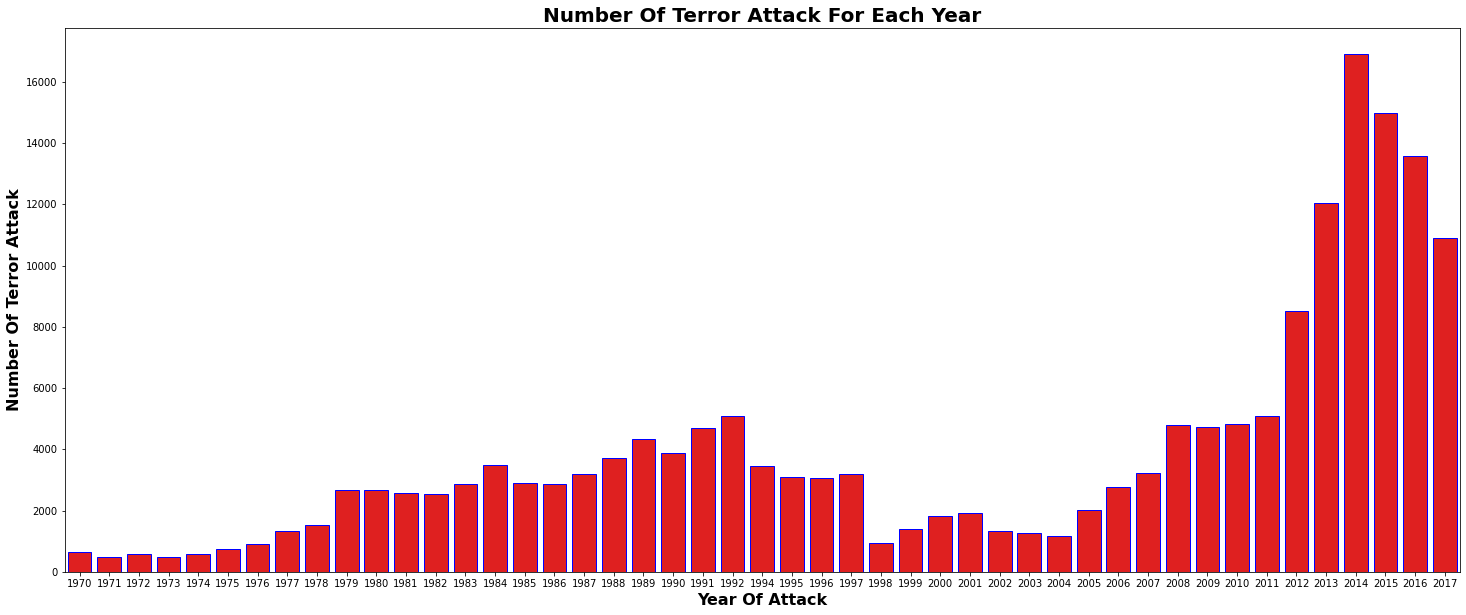

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(df['Year'],color='r',edgecolor='b')
plt.xlabel('Year Of Attack',fontweight='bold',size=16)
plt.ylabel('Number Of Terror Attack',fontweight='bold',size=16)
plt.title('Number Of Terror Attack For Each Year',fontweight='bold',size=20)

**Large Number Of Terrorist Activities has happen in 2014.**

**Second Objective : Number Of Sucessful Attack in each Year.**

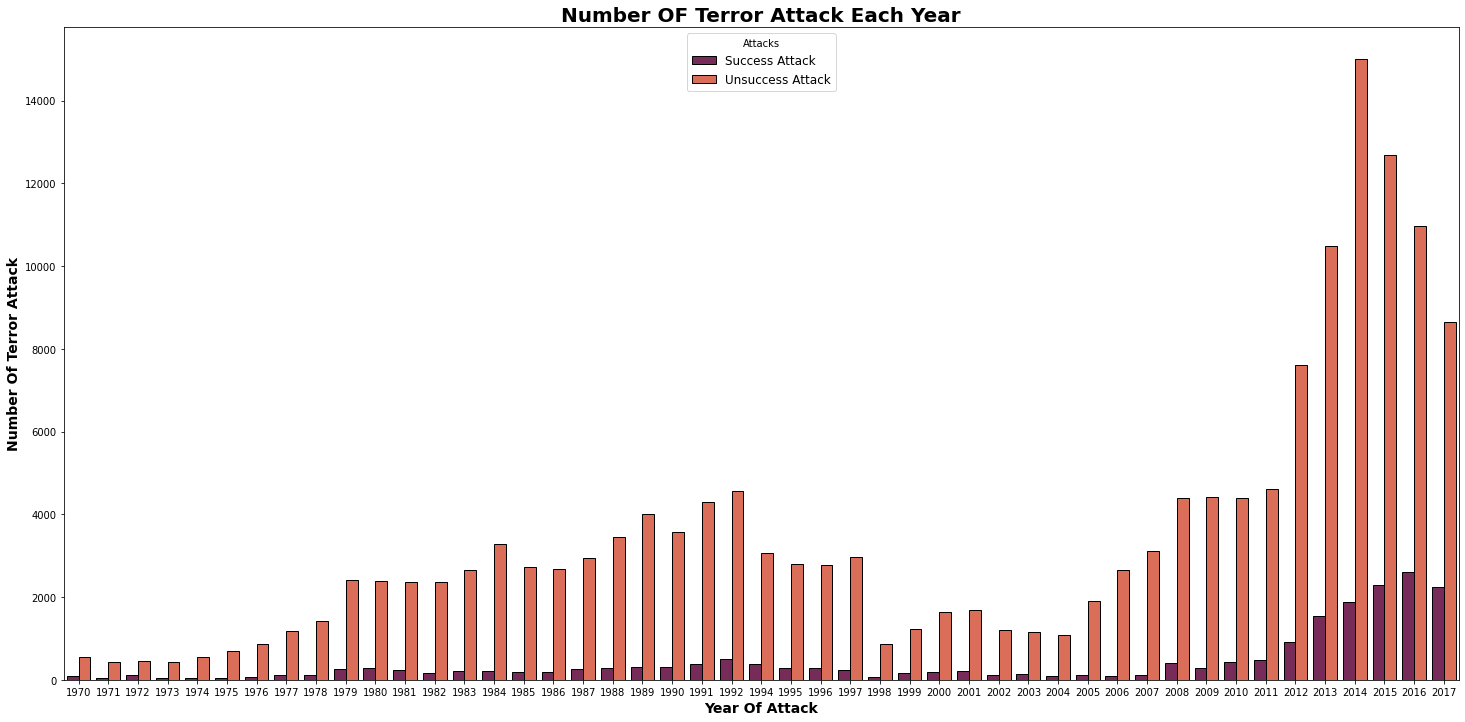

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(x=df['Year'], hue='Success', data=df, edgecolor = 'k',palette='rocket')
plt.xlabel('Year Of Attack',fontweight='bold',size=14)
plt.ylabel('Number Of Terror Attack',fontweight='bold',size=14)
plt.title('Number OF Terror Attack Each Year', fontweight='bold',fontsize=20)
plt.legend(title='Attacks', loc='upper center', labels=['Success Attack', 'Unsuccess Attack'],fontsize=12)


# **In 2016 Most sucessful Attack done by Terrorist.**

**Third Objective : Region Of Terrorist Attack in Each Year.**

Text(0.5, 1.0, 'Region Of Terrorist Attack')

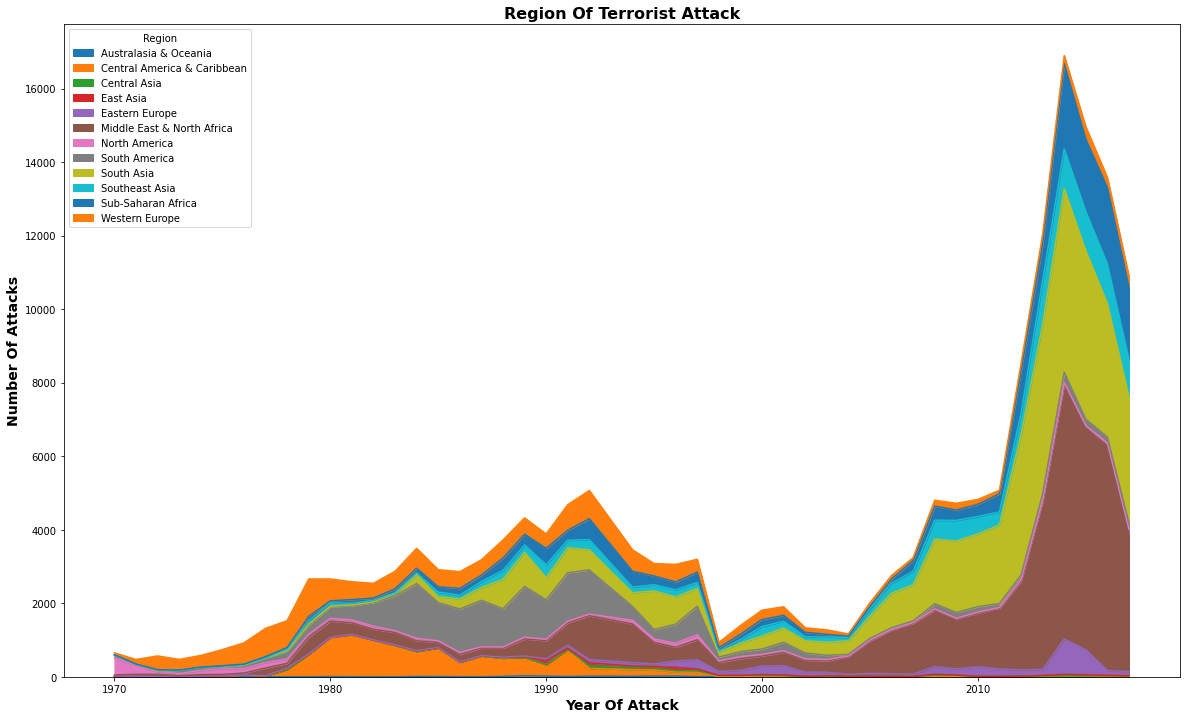

In [ ]:
region = pd.crosstab(df['Year'],df['Region'])
region.plot(kind='area',figsize=(20,12))
plt.xlabel('Year Of Attack',fontweight='bold',size=14)
plt.ylabel('Number Of Attacks',fontweight='bold',size=14)
plt.title('Region Of Terrorist Attack',fontweight='bold',size=16)

# **Most Attack happen in 'Middle East and North Africa' region.**

**Fourth Objective : Which Type Of Attack happen.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Attack Type')

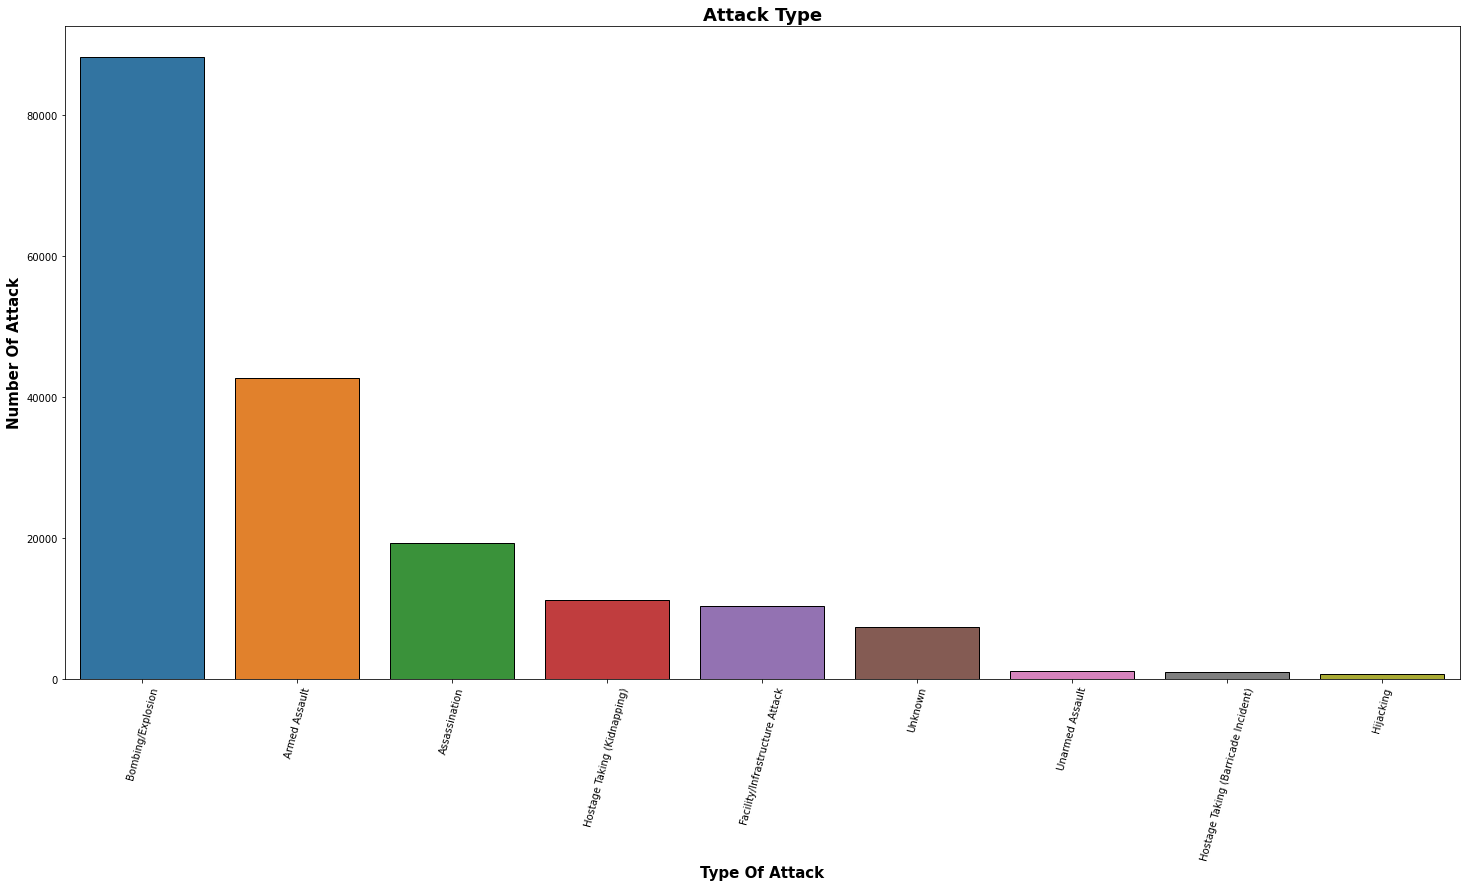

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(df['Attack_type'],edgecolor='k',order=df['Attack_type'].value_counts().index)
plt.xticks(rotation = 75)
plt.ylabel('Number Of Attack',size=15,fontweight='bold')
plt.xlabel('Type Of Attack',size=15,fontweight='bold')
plt.title('Attack Type',fontweight='bold',size=18)

**Maximum Number Of Attack are Bombing or Explosion and Armed Assault.**

**Fifth Objective : Weapon type of Terrorist Attack.**

Text(0.5, 1.0, 'Types of Weapon')

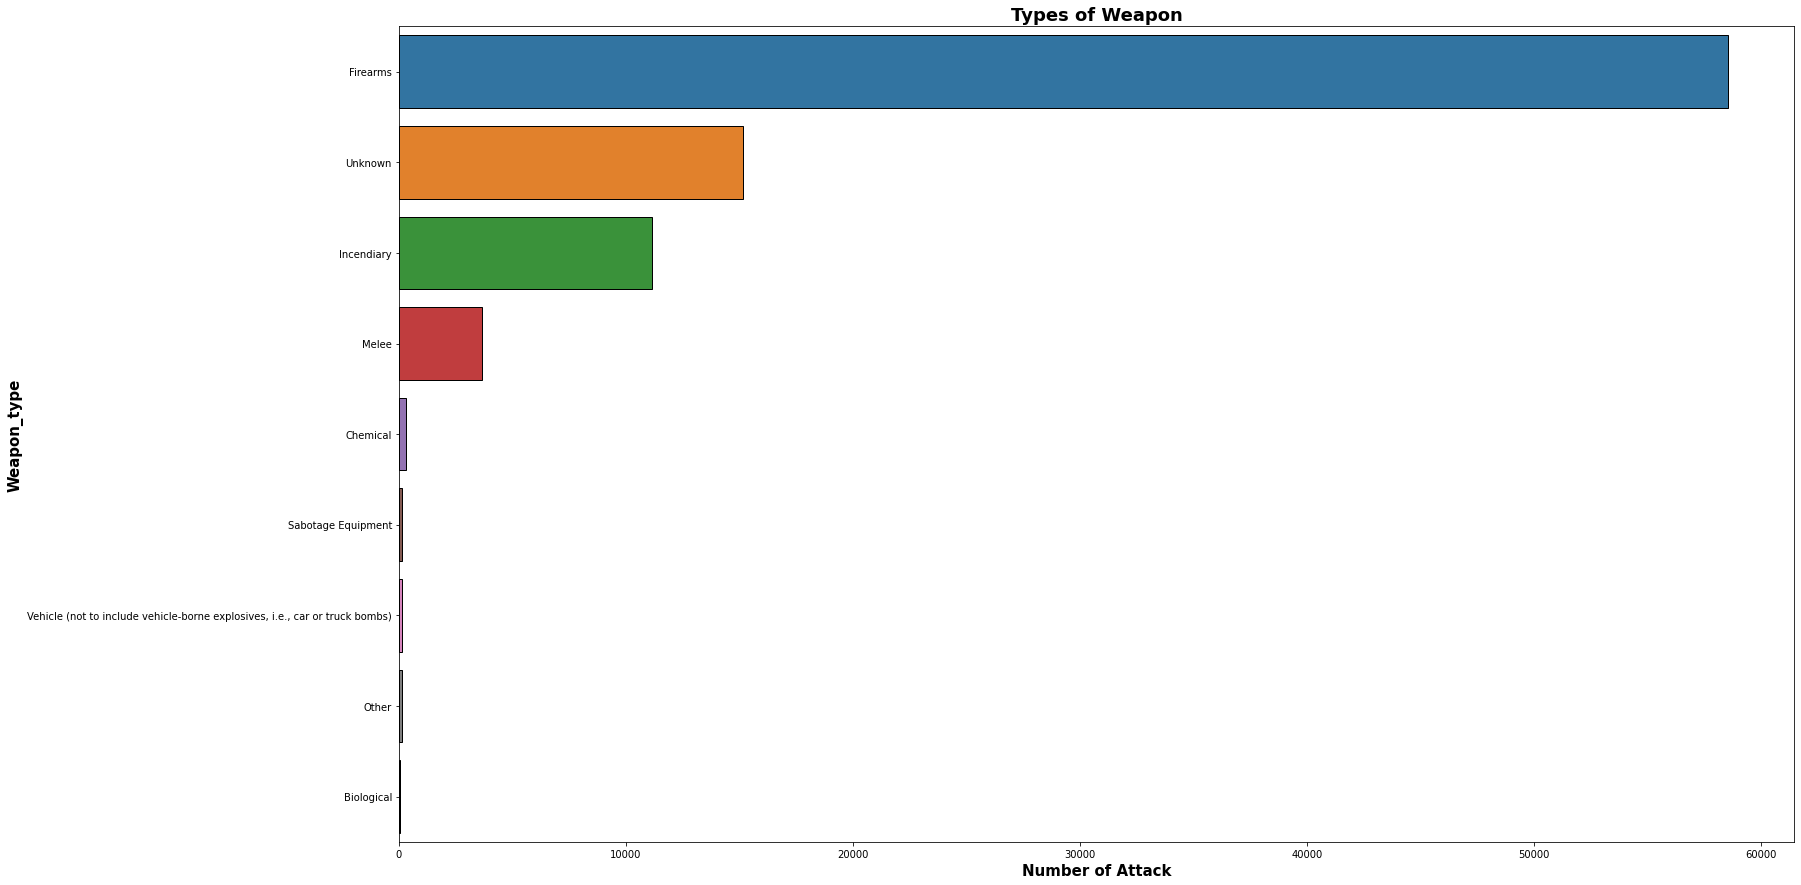

In [ ]:
plt.figure(figsize=(25,15))
sns.barplot(y=df['Weapon_type'].value_counts()[1:10].index, x=df['Weapon_type'].value_counts()[1:10].values,edgecolor='k')
plt.ylabel('Weapon_type',fontweight='bold',size=15)
plt.xlabel('Number of Attack',fontweight='bold',size=15)
plt.title('Types of Weapon',fontweight='bold', size=18)
#plt.xticks(rotation='50')

**Maximum Number Of 'Firearms Weapon' are used for Terrorist Attack.**

**Six Objective : Type Of Target**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type Of Target')

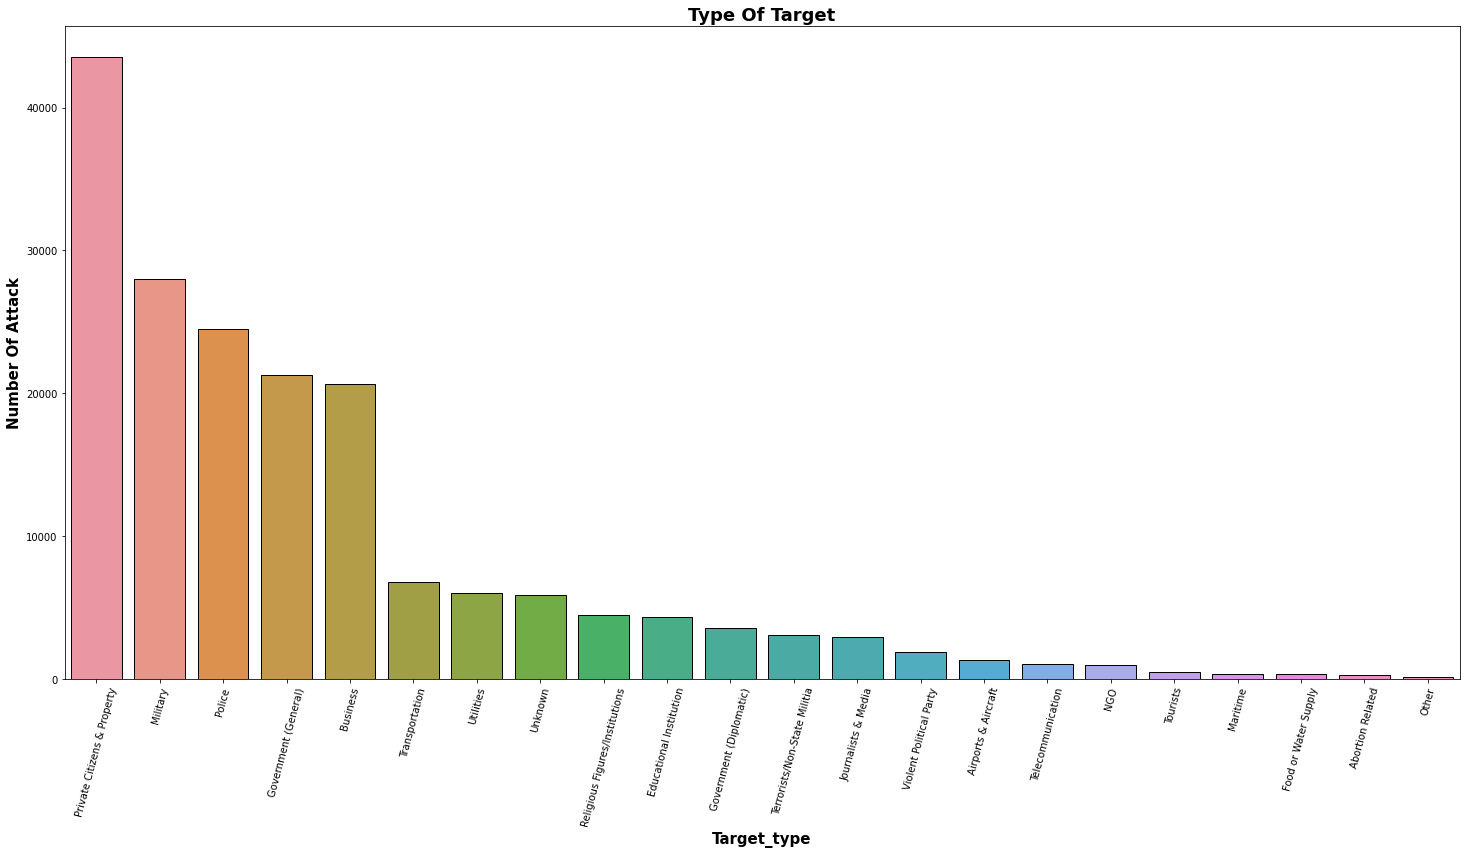

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(df['Target_type'],order=df['Target_type'].value_counts().index,edgecolor='k')
plt.xticks(rotation=75)
plt.ylabel('Number Of Attack',size=15,fontweight='bold')
plt.xlabel('Target_type',size=15,fontweight='bold')
plt.title('Type Of Target',size=18,fontweight='bold')


**Private Citizens & Property And Militrary is the Main Target of Terrorist.**

**Seventh Objective : Most Active Terrorist Organizations.**

Text(0.5, 1.0, 'Most Active Terrorist Group')

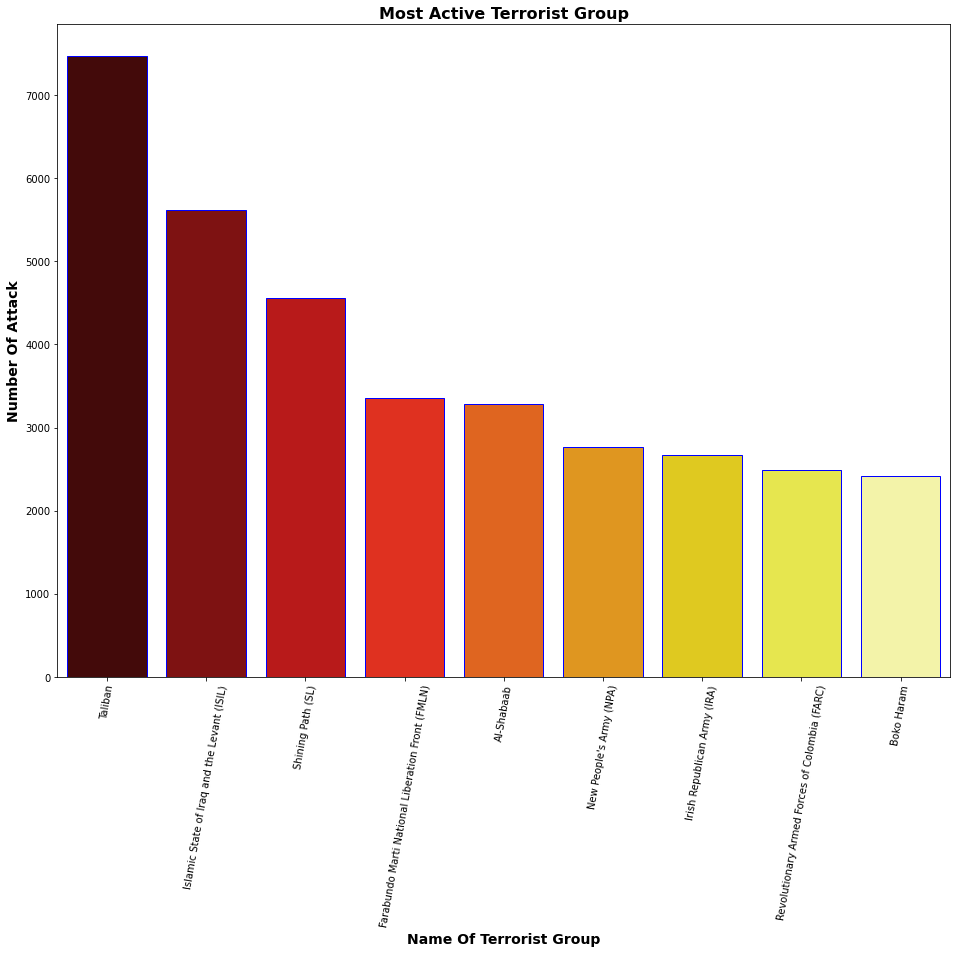

In [ ]:
plt.figure(figsize=(16,12))
sns.barplot(x=df['Group_name'].value_counts()[1:10].index,y=df['Group_name'].value_counts()[1:10].values,edgecolor='b',palette='hot')
plt.xticks(rotation=80)
plt.xlabel('Name Of Terrorist Group',fontweight='bold',size=14)
plt.ylabel('Number Of Attack',fontweight='bold',size=14)
plt.title('Most Active Terrorist Group',fontweight='bold',size=16)

**Most Active Terrorist Organization are Taliban and Islamic State of Iraq and the Levant(ISIL).**

**Eight Objective : Total Numbers of Attack in Each Country and Region.**

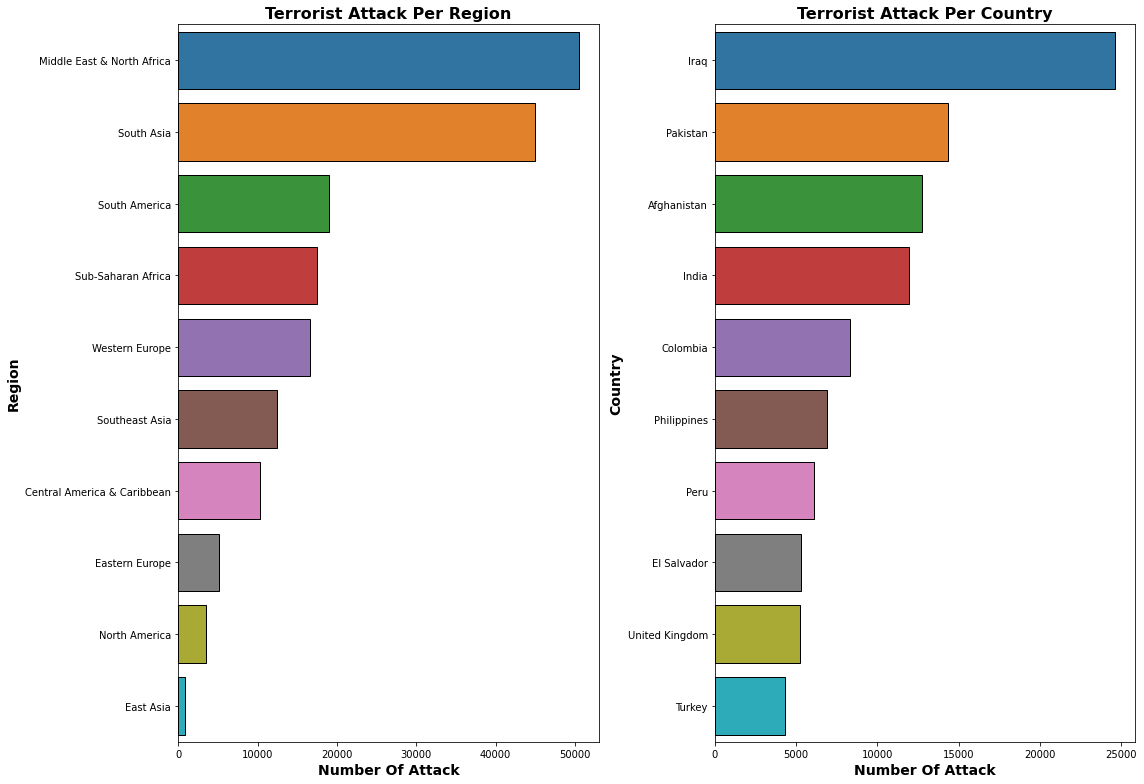

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y=df['Country'].value_counts()[0:10].index,x=df['Country'].value_counts()[0:10].values,ax=axes[1],edgecolor='k')
axes[1].set_xlabel('Number Of Attack',fontweight='bold',size=14)
axes[1].set_ylabel('Country',fontweight='bold',size=14)
axes[1].set_title('Terrorist Attack Per Country',fontweight='bold',size=16)


sns.barplot(y=df['Region'].value_counts()[0:10].index, x=df['Region'].value_counts()[0:10].values,ax=axes[0],edgecolor='k')
axes[0].set_xlabel('Number Of Attack',fontweight='bold',size=14)
axes[0].set_ylabel('Region',fontweight='bold',size=14)
axes[0].set_title('Terrorist Attack Per Region',fontweight='bold',size=16)
fig.tight_layout()

**Middle East & North Africa And South Asia has most Terrorist region. And Iraq has happen Most Terrorist Activities.**

**Nineth Objective : How Many People Are killed in Terrorist Activities.**

Text(0.5, 1.0, 'Number Of People Killed During Attack')

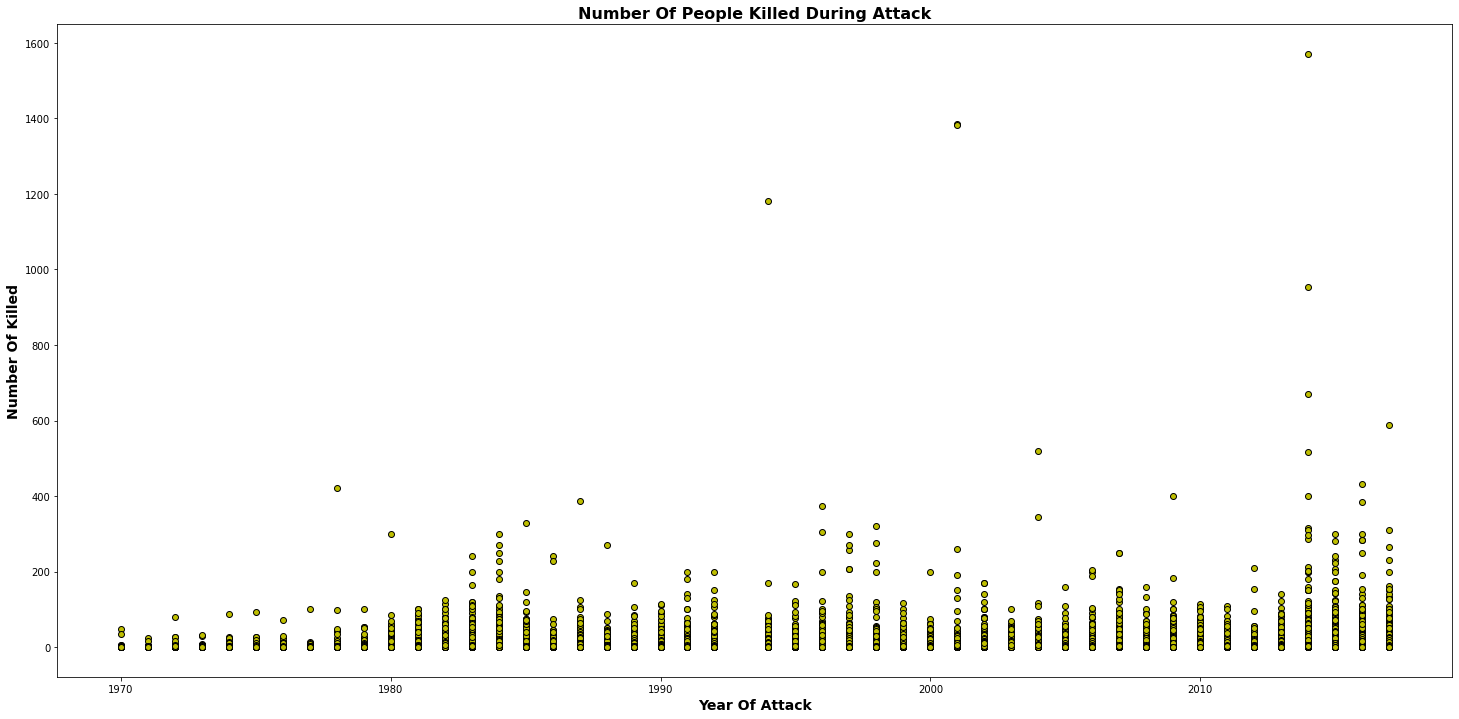

In [ ]:
plt.figure(figsize=(25,12))
plt.scatter(df['Year'],df['Killed'],color='y',edgecolor='k')
plt.xlabel('Year Of Attack',fontweight='bold',size=14)
plt.ylabel('Number Of Killed',fontweight='bold',size=14)
plt.title('Number Of People Killed During Attack',fontweight='bold',size=16)

**In 2014 Maximum people died in Terrorist Attack.**

**Ten Objective : Number Of People Wounded in Terrorist Attack.**

Text(0.5, 1.0, 'Number Of People Wounded During Attack')

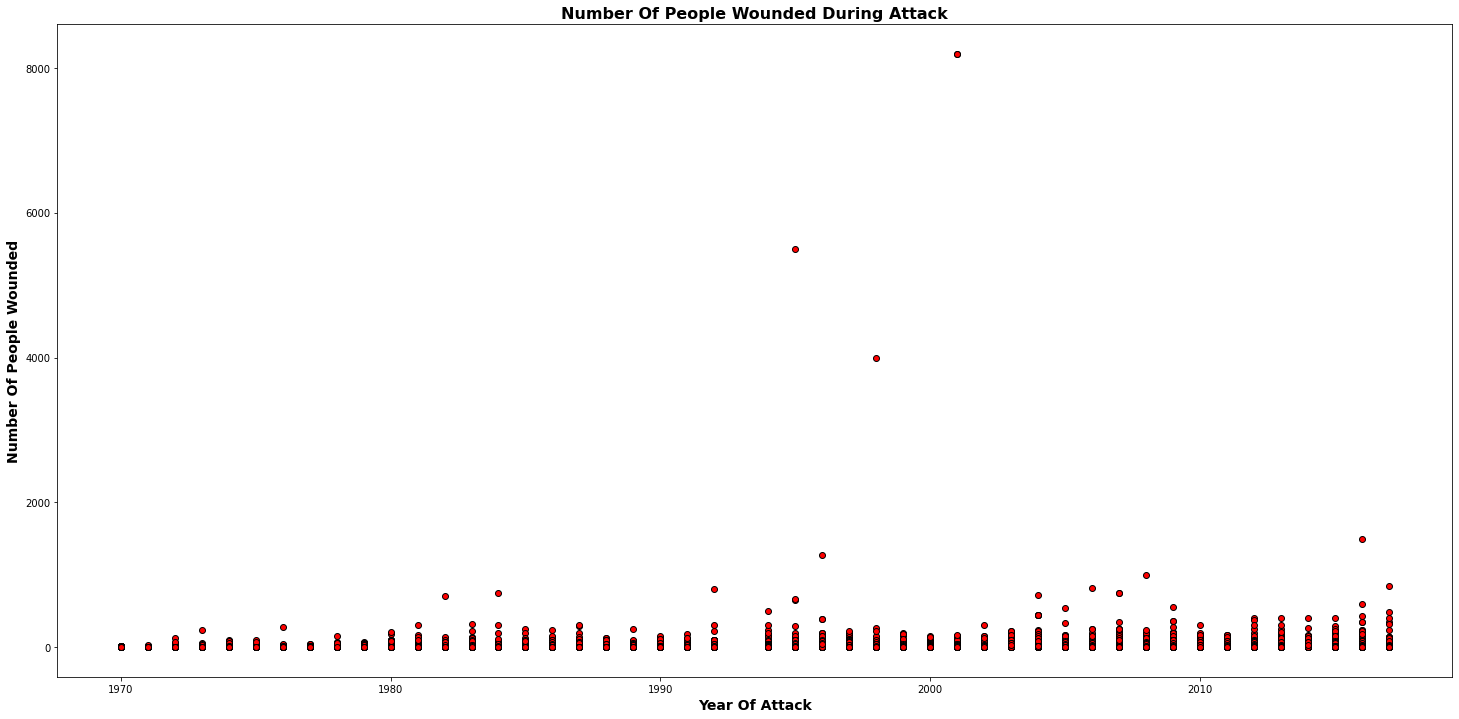

In [ ]:
plt.figure(figsize=(25,12))
plt.scatter(df['Year'],df['Wounded'],color='r',edgecolor='k')
plt.xlabel('Year Of Attack',fontweight='bold',size=14)
plt.ylabel('Number Of People Wounded',fontweight='bold',size=14)
plt.title('Number Of People Wounded During Attack',fontweight='bold',size=16)

Conclusion:


1.   **Most Active Terrorist Organization are Taliban and Islamic State of Iraq and the Levant(ISIL).**
2.   **Private Citizens & Property And Militrary is the Main Target of Terrorist.**
3.  **In 2014 Maximum people died in Terrorist Attack.**
4. **Maximum Number Of 'Firearms Weapon' are used for Terrorist Attack.**
5. **Iraq ranked first on terrorist activity and Middle East & North Africa And South Asia has most Terrorist region.**

